In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Exercise 01 
---

## 1) A coin flip
Each of n ∈ N players has a ∈ N fair coins. In a round each player tosses one coin. If all or no
coins show heads, all coins are put aside. If exactly one coin shows head, only that player gets
his coin back and additionally a coin from the coins aside (if this set is empty, that player gets
no additional coin). If ≥ 2 and < n coins show heads, only that players get their coins back.
The game ends if at least one player has no coins. We call it a draw when all players end with
zero coins.


In [2]:
#SIN LOS COMENTARIOS DEBUGGEADORES 

def flip_coin(n, a):
    p_head = 0.5
    round_number = 1
    endgame = False # flag
    
    coins = [[] for _ in range(n)] # historial de monedas tiradas por cada jugador
    
    player_coins = [a for _ in range(n)] # lista con las monedas actuales de cada jugador
    
    coins_aside = 0
    
    while not endgame:
        # if someone has 0 coins, endgame
        for p in range(n):
            if player_coins[p] == 0:
                endgame = True
                break
        if endgame:
            break
        
        # RONDA: cada jugador tira 1 moneda
        round_results = {}  # Diccionario de la ronda: jugador -> resultado (0 cara / 1 seca)
        
        # cada jugador tira su moneda
        for p in range(n):
            if player_coins[p] > 0: # if the player still has coins, they can play
                player_coins[p] -= 1 # paga la moneda que tiró
                if random.random() < p_head:
                    coin = 1  # CARA
                else:
                    coin = 0  # CRUZ
                coins[p].append(coin) # historial
                round_results[p] = coin # resultado de esta ronda
        
        # contar caras en la ronda
        heads_players = []
        for p in round_results:
            result = round_results[p] # 0 o 1
            if result == 1:
                heads_players.append(p) # jugadores que sacaron cara
        k = len(heads_players) # número de jugadores que sacaron cara
        
        # REGLAS DEL JUEGO
        if k == 0 or k == n:
            # todos o ninguno: todas al aside
            coins_aside += len(round_results)  # solo contar los que tiraron
              
        elif k == 1:
            # exactamente 1 cara: ese recupera la suya
            winner = heads_players[0] # el player con cara
            player_coins[winner] += 1
            
            # y además gana 1 del aside si hay
            if coins_aside > 0:
                player_coins[winner] += 1
                coins_aside -= 1

        else:  # 2 <= k < n
            # entre 2 y n-1: los que sacaron cara recuperan su moneda
            for p in heads_players:
                player_coins[p] += 1
            
        round_number += 1
    
    # resultado final
    all_zero = True
    for c in player_coins:
        if c != 0:
            all_zero = False
            break
    
    if all_zero:
        result = "Draw"
    else:
        result = "Someone lost"
    
    return result, player_coins, coins_aside, coins, round_number


# Ejemplo de uso
if __name__ == "__main__":
    random.seed(42)  # para reproducibilidad
    result, final_coins, aside, history, rounds = flip_coin(n=3, a=5)
    
    print("HISTORIAL COMPLETO")
    for i, player_history in enumerate(history):
        print(f"Jugador {i}: {player_history}")


HISTORIAL COMPLETO
Jugador 0: [0, 1, 0, 1, 1, 0, 0]
Jugador 1: [1, 0, 1, 1, 1, 1, 1]
Jugador 2: [1, 0, 1, 0, 0, 0, 0]



### a) We consider the parameters (n = 2, a = 2). Answer the following questions analytically:
#### (i) Determine all possible paths of the game and the final results with its probabilities.
If we have 2 players with 2 coins each the results for a round are the following:
* $0 1$ -> player 1 looses a coin
* $0 0$ -> both loose a coin 
* $1 1$ -> both loose a coin
* $1 0$ -> player 2 looses a coin

So there's a $75$% chance for each player to loose a coin, and a $25$% chance of keeping it. Since a player can't win or loose in a single round the final results and probabilities for a player are the following. 

In 2 rounds: 
* Endgame W: $0.75 * 0.25 = 0.19$%
* Endgame L: $0.75 * 0.25 = 0.19$%
* Endgame Draw: $0.5 * 0.5 = 0.25$%
* No endgame: $1 - 0.625 = 0.375$% 



#### (ii)What is the average number of rounds for this new coin game?
The chances of having an endgame on the second round is larger than the chances of getting a third, but there is no chance of ending a game in less than two round so the average shouold be over 2, but less than 3. So the average game is over two rounds long.
#### (iii) In a draw there are no winners. What is the expected number of coins of the winner?
The winner would usually have just one coin. 
### (b) Write a MATLAB/Python function that simulates the generalized coin game above. Check it via your results to the questions in (a). Give the Monte Carlo approximations for the following questions for the both parameter pairs (n = 3, a = 5) and (n = 9, a = 12) with 10**6 Monte Carlo runs:


In [3]:
runs = 10**6

#### (i) What is the average number of rounds?


Caso (3,5): 7.33934
Caso (9,12): 18.536744


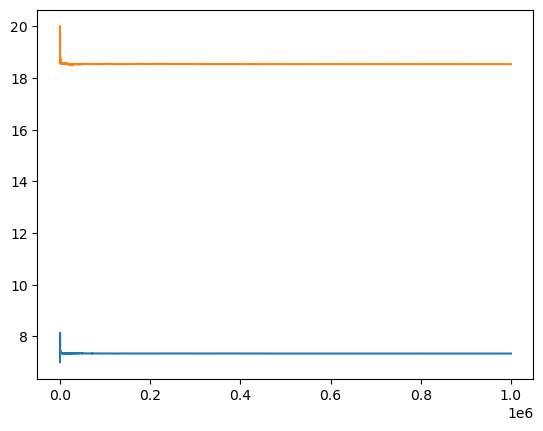

In [4]:
sum = 0
promedios = []
for i in range(runs):
    _, _, _, _, round = flip_coin(3,5)
    sum += round
    promedio_actual = sum / (i+1)
    promedios.append(promedio_actual)
plt.plot(promedios)
print(f"Caso (3,5): {promedios[-1]}")

sum = 0
promedios = []
for i in range(runs):
    _, _, _, _, round = flip_coin(9,12)
    sum += round
    promedio_actual = sum / (i+1)
    promedios.append(promedio_actual)
plt.plot(promedios)
print(f"Caso (9,12): {promedios[-1]}")



#### (ii) What is the probability of a draw (i.e. all players end with zero coins)?


Caso (3,5): 0.011458
Caso (9,12): 0.0


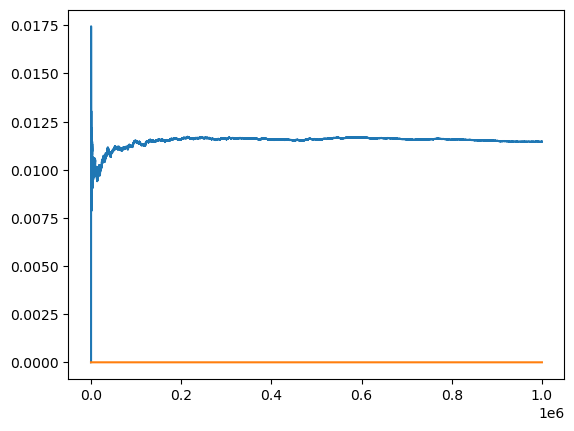

In [5]:
draws = 0
promedios = []
for i in range(runs): 
    result, _, _, _, _ = flip_coin(3,5)
    if result == "Draw":
        draws += 1
    promedio_actual = draws / (i+1)
    promedios.append(promedio_actual)
plt.plot(promedios)
print(f"Caso (3,5): {promedios[-1]}")

draws = 0
promedios = []
for i in range(runs): 
    result, _, _, _, _ = flip_coin(9,12)
    if result == "Draw":
        draws += 1
    promedio_actual = draws / (i+1)
    promedios.append(promedio_actual)
plt.plot(promedios)
print(f"Caso (9,12): {promedios[-1]}")

#### (iii) How many coins has the winner (or winners) of the coin game on average? In a draw (all players lost their coins) there are no winners.


Caso (3,5): 2.287827711240523
Caso (9,12): 3.7000239204515237


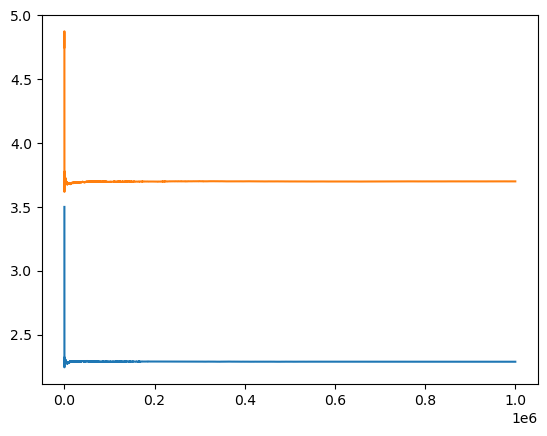

In [6]:
sum_coins = 0
sum_nonlosers = 0
promedios = []

for i in range(runs):
    result, player_coins, _, _, _ = flip_coin(3,5)

    if result == "Someone lost":
        for c in player_coins:
            if c != 0:
                sum_nonlosers += 1
                sum_coins += c

    promedios.append(sum_coins / sum_nonlosers if sum_nonlosers > 0 else 0)

plt.plot(promedios)
print(f"Caso (3,5): {promedios[-1]}")


sum_coins = 0
sum_nonlosers = 0 
promedios = []

for i in range(runs):
    result, player_coins, _, _, _ = flip_coin(9,12)

    if result == "Someone lost":
        for c in player_coins:
            if c != 0:
                sum_nonlosers += 1
                sum_coins += c

    promedios.append(sum_coins / sum_nonlosers if sum_nonlosers > 0 else 0)

plt.plot(promedios)
print(f"Caso (9,12): {promedios[-1]}")

Explain your estimated result and the connection to the exact solution!


Remark: Your submission for this task should contain the MATLAB/Python function coin,
a script to generate approximation results coin mc and your obtained values in the .pdf- file.
Present all numbers from approximations with a sufficient number of digits (e.g. here at least
4).

## 2) Chess duel
We consider a generalization of the chess duel from the lecture:
Two chess players A and B play a match of N ∈ N rounds. It ends with a draw with probability
d1 ∈ (0, 1/2) and player A wins with probability p1 ∈ (0, 1 − d1).
If one player wins a game, only this player gets one point. For a draw both players get 0.5
points. The match ends if one player has a point number which cannot be attained by the other
player.
If the match ends with a draw of points they play a tie-break: They play rapid chess games
until the first win. In rapid chess it ends with a draw with probability d2 ∈ (0, 1/2) and player
A wins with probability p2 ∈ (0, 1 − d2).


In [7]:

def chess_duel_function(p1, d1, p2, d2, max_rounds=14):
    result = [0, 0] #[A,B]
    round = 0
    
    while (max(result) <= max_rounds/2) and (round < max_rounds):
        x = np.random.random()
        
        if x < p1: # A gana
            result[0] += 1
        elif x < p1 + (1 - p1 - d1):  # B gana
            result[1] += 1
        else:  # Draw
            result[0] += 0.5
            result[1] += 0.5
        
        round += 1
        
        # Verificar si alguien ya ganó (ventaja insuperable)
        rounds_left = max_rounds - round
        if result[0] > result[1] + rounds_left or result[1] > result[0] + rounds_left:
            break
    
    # Si hay empate al final, tie-break con rapid chess
    if result[0] == result[1]:
        while True:
            x = random.random()
            round += 1
            
            if x < p2:  # A gana en rapid
                result[0] += 1
                break
            elif x < p2 + (1 - p2 - d2):  # B gana en rapid
                result[1] += 1
                break
            # Si empata en rapid, continúa el tie-break
    
    return result, round



We are interested in the questions:
* How many rounds has the match on average?
* What is the probability of a tie-break?
* What is the probability of player B winning the match?
Write a Monte Carlo simulation for the chess duel with the input parameters p1, d1, p2, d2 and N
rounds. (Do not use complicated MATLAB/Python functions like the multinomial distribution!
The problem can be simply implemented by random numbers !)


### (a) Give an approximation for the questions above for the parameters p1 = 0.36, d1 = 0.4, p2 = 0.29, d2 = 0.5, N = 14 via 10**6 Monte Carlo runs.


In [8]:
p1 = 0.36
d1 = 0.4
p2 = 0.29
d2 = 0.5
N_rounds = 14
N_simulations = 10**6

total_rounds = 0
tiebreak_count = 0
B_wins = 0


for i in range(N_simulations):
    result, rounds = chess_duel_function(p1, d1, p2, d2, N_rounds)
    total_rounds += rounds
    
    # Contar tie-breaks (si se jugaron más de N_rounds)
    if rounds > N_rounds:
        tiebreak_count += 1
    
    # Contar victorias de B
    if result[1] > result[0]:
        B_wins += 1


# Resultados parte (a)
avg_rounds = total_rounds / N_simulations
prob_tiebreak = tiebreak_count / N_simulations
prob_B_wins = B_wins / N_simulations

print(f"1. Promedio de rondas por match: {avg_rounds:.4f}")
print(f"2. Probabilidad de tie-break: {prob_tiebreak:.4f}")
print(f"3. Probabilidad de que B gane: {prob_B_wins:.4f}")


1. Promedio de rondas por match: 12.8176
2. Probabilidad de tie-break: 0.1148
3. Probabilidad de que B gane: 0.2722


### (b) Give for the parameters d1 = 0.26, d2 = 0.29, p2 = 0.98 · p1; N = 14 an approximation of the function plot (0, 1/2) → [0, 1], p1 7→ P(Player B wins for probability p1) via Monte Carlo simulations with 105 MC runs for all p1 ∈ {0.01, 0.02, . . . , 0.5}.


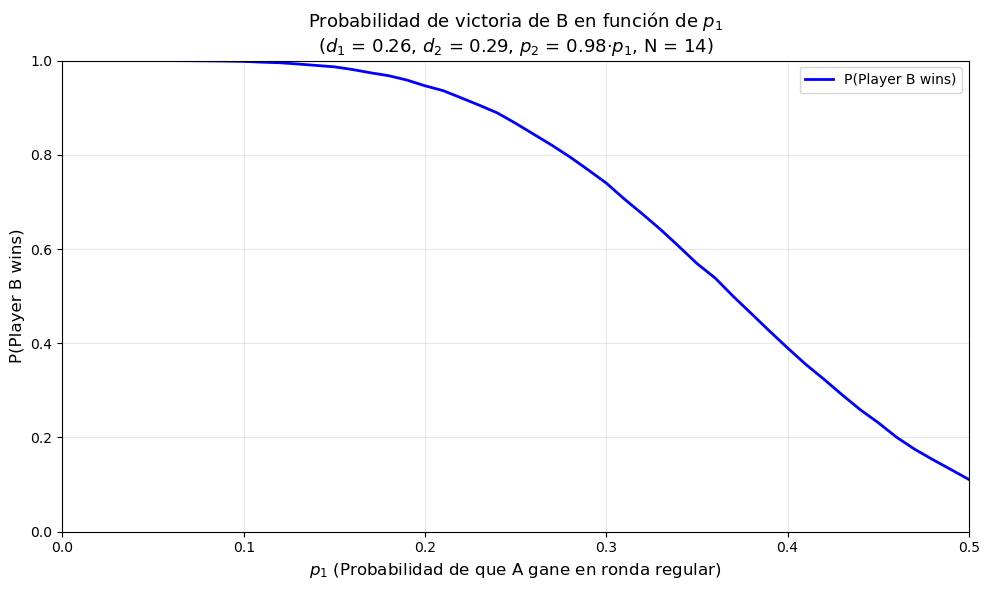

In [9]:

# Parámetros fijos para parte (b)
d1_b = 0.26
d2_b = 0.29
N_rounds_b = 14
N_sims_per_p1 = 10**5

# Valores de p1 a explorar
p1_values = np.arange(0.01, 0.51, 0.01)
prob_B_values = []


for idx, p1_val in enumerate(p1_values):
    p2_val = 0.98 * p1_val  # Relación dada en el problema
    
    B_wins_count = 0
    for _ in range(N_sims_per_p1):
        result, _ = chess_duel_function(p1_val, d1_b, p2_val, d2_b, N_rounds_b)
        if result[1] > result[0]:
            B_wins_count += 1
    
    prob_B = B_wins_count / N_sims_per_p1
    prob_B_values.append(prob_B)
    

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(p1_values, prob_B_values, 'b-', linewidth=2, label='P(Player B wins)')
plt.xlabel('$p_1$ (Probabilidad de que A gane en ronda regular)', fontsize=12)
plt.ylabel('P(Player B wins)', fontsize=12)
plt.title('Probabilidad de victoria de B en función de $p_1$\n' + 
          f'($d_1$ = {d1_b}, $d_2$ = {d2_b}, $p_2$ = 0.98·$p_1$, N = {N_rounds_b})', 
          fontsize=13)
plt.grid(True, alpha=0.3)
plt.xlim(0, 0.5)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.savefig('probability_B_wins_vs_p1.png', dpi=300, bbox_inches='tight')
plt.show()


# Guardar datos en archivo CSV
data_output = np.column_stack([p1_values, prob_B_values])
np.savetxt('results_part_b.csv', data_output, delimiter=',', header='p1,prob_B_wins', comments='')

Remark: Your submission for this task should contain the MATLAB/Python function chessduel,
a script to generate approximation results of (i) and the plot of (ii) chessduel mc as well as
your obtained values and plot in the .pdf file.